**1. Read “Sensor readings, with temperature, light, humidity every 5 minutes at 8
locations (trial, 2014 to 2015)” and print the feature name with numbers of missing
entries.**

In [18]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Read the file
df = pd.read_csv("/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")
dfc=df.copy()
print(dfc.shape)
dfc.head()

(56570, 21)


,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [6]:
#Dropping duplicate rows
dfc.drop_duplicates(inplace=True)
print(dfc.shape)

(56570, 21)


**INSIGHTS**
* No duplicate rows found.

**2. Fill in the missing entries. For filling any feature, you can use either the mean or
median value of the feature values from observed entries. Explain the reason behind
your choice and print replacement value of each feature.**

In [11]:
# Counting missing values for each feature
missing_values = dfc.isnull().sum()
for feature, missing in missing_values.items():
    if missing > 0:
        print(f"{feature}: {missing}")

Position: 56570


**INSIGHTS**
* "Position" feature has no value. So, we can remove it.
* "Elevation" has 21595 null values. We will choose mean over median to fill the null values becuase the mean is less sensitive to outliers and there is continuous distribution of data in this feature.

In [10]:
# Calculate the mean and median for each feature with missing values
dfc['elevation'].fillna((dfc['elevation'].mean()), inplace=True)

**3. Use a histogram to show the distribution of the variable “location”. Explain the
distribution and show how many locations are there in total.**

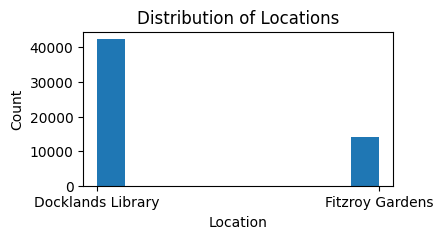

There are a total of 2 locations.


In [16]:
plt.figure(figsize=(4, 2))
plt.hist(dfc['location'])
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Locations')
plt.show()
unique_location_count = dfc['location'].nunique()
print(f"There are a total of {unique_location_count} locations.")

**INSIGHTS**
* The plot shows a skewed distribution where the majority of the data points are concentrated in Docklands Library. This implies that Docklands Library is a more frequent or popular location than Fitzroy Gardens.

**4. Encode the categorical variable “location" using an appropriate encoding approach
and display the encoded values. Justify your selection of encoding approaches.**

In [17]:
dfc_encoded = pd.get_dummies(dfc, columns=['location'])
# Display the encoded values
dfc_encoded.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_avg,model,latitude,longitude,elevation,rowid,Position,geolocation,location_Docklands Library,location_Fitzroy Gardens
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,ENV,-37.819712,144.941325,NaN,510-20150124104500,NaN,"-37.8197121, 144.9413253",True,False
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,ENV,-37.819500,144.941889,NaN,511-20150124111500,NaN,"-37.8195002, 144.9418888",True,False
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,ENV,-37.819904,144.940485,NaN,509-20150124111500,NaN,"-37.8199043, 144.9404851",True,False
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,ENV,-37.819904,144.940485,NaN,509-20150124115500,NaN,"-37.8199043, 144.9404851",True,False
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,ENV,-37.819712,144.941325,NaN,510-20150124115500,NaN,"-37.8197121, 144.9413253",True,False


**JUSTIFICATION**
One hot encoding is chosen because "location" is binary feature and to avoid misleading ordinal relationships by treating each category "Docklands Library" and "Fitzroy Gardens" as independent features.

**5. Apply the min-max scaling on features "[boardtype, boardid ,temp_max, temp_min,
temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max,
humidity_avg]" . Plot distribution of first six features before and after scaling. Is there
any difference? Please explain.**

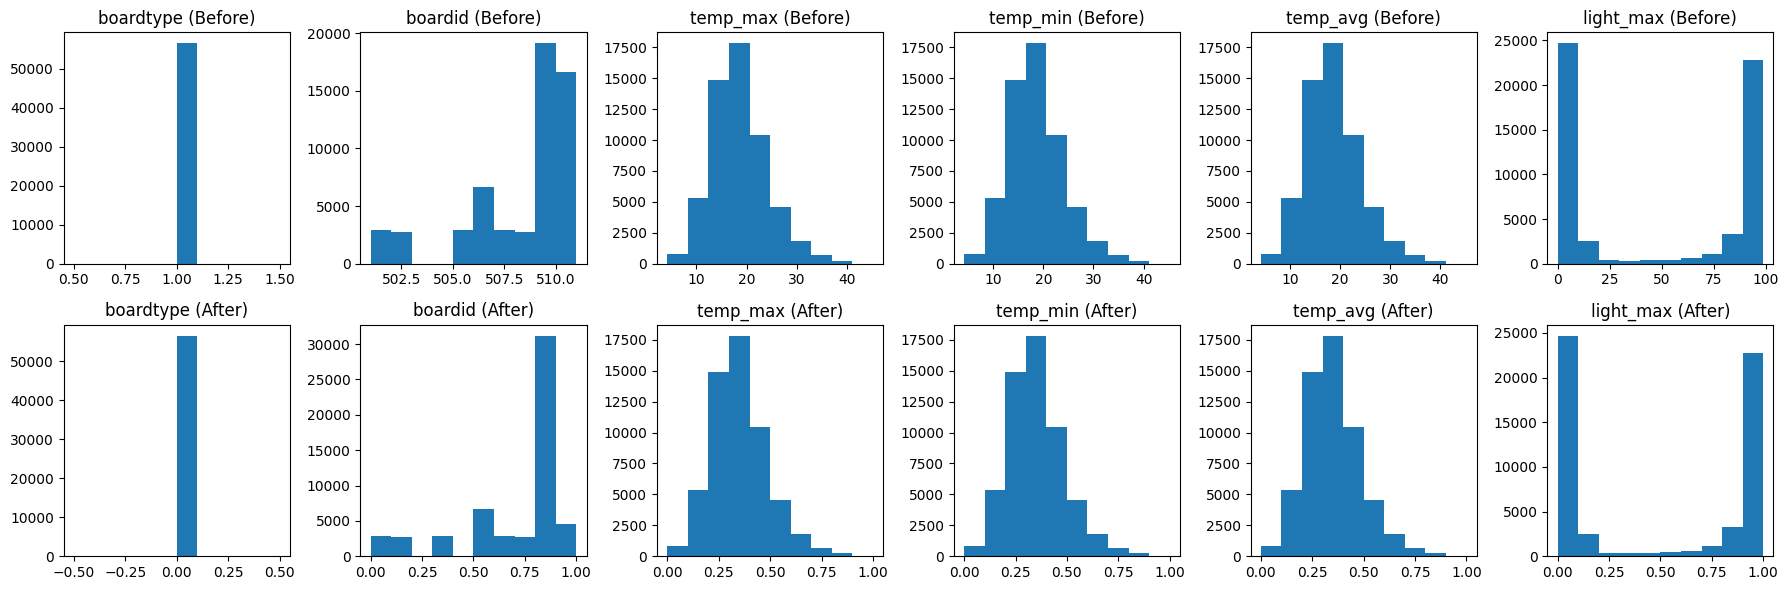

In [21]:
scaling_features = ["boardtype", "boardid", "temp_max", "temp_min", "temp_avg", "light_max", "light_min", "light_avg",
                     "humidity_min", "humidity_max", "humidity_avg"]
scaler = MinMaxScaler()
dfc_scaled = dfc.copy()
dfc_scaled[scaling_features] = scaler.fit_transform(dfc_scaled[scaling_features])

# Plot distributions before and after scaling for the first six features
fig, axes = plt.subplots(2, 6, figsize=(18, 6))
for i, feature in enumerate(scaling_features[:6]):
    # Before scaling
    axes[0, i].hist(dfc[feature])
    axes[0, i].set_title(f"{feature} (Before)")

    # After scaling
    axes[1, i].hist(dfc_scaled[feature])
    axes[1, i].set_title(f"{feature} (After)")
plt.tight_layout()
plt.show()

**Explanation:**
* the *shape* of the distributions remains the same. However, the x-axis (representing the feature values) now ranges from 0 to 1 for all scaled features.
This makes the features comparable and prevents features with larger ranges from dominating the learning process in machine learning algorithms.
* Boardtype remains unchanged, suggesting it was either binary or a constant value.
Boardid, temp_max, temp_min, temp_avg, and light_max: The values are scaled to a range (typically 0 to 1), which is common for normalization or standardization techniques used in preprocessing to ensure that features contribute equally to the model.
Shape Preservation: The overall shapes of the distributions are preserved, indicating that the scaling process was likely a linear transformation that did not distort the data's underlying distribution.


